# PIC16A Final Exam, Problem 2 (45 points)

### *Spring 2021*

## Academic Integrity Statement

As a matter of Departmental policy, **we are required to give you a 0** unless you **type your name** after the following statement: 

> *I certify on my honor that I have neither given nor received any help, or used any non-permitted resources, while completing this evaluation.*

\[Eirik Aalstad Baekkelund\]

## Permitted Resources

This exam is open-book, open-notes, open-internet, open-everything. The only thing you are not allowed to do is ask another human being for help, with the exception of me. Examples: 

1. **Permitted**: Checking course notes and videos; browsing Google or StackOverflow; consulting previous Campuswire posts. 
2. **Not permitted**: Requesting help on Chegg; publicly posting on Campuswire (messages to me are ok); privately asking classmates for help; posting on StackOverflow. 

If you encounter any situation in which you're not 100% sure what's permitted, **just ask**! 


### Partial Credit

Let us give you partial credit! If you're stuck on a problem and just can't get your code to run: 

First, **breathe**. Then, do any or all of the following: 
    
1. Write down everything relevant that you know about the problem, as comments where your code would go. 
2. If you have non-functioning code that demonstrates some correct ideas, indicate that and keep it (commented out). 
3. Write down pseudocode (written instructions) outlining your solution approach. 

In brief, even if you can't quite get your code to work, you can still **show us what you know.**

# Introduction

In this problem, you'll use object-oriented programming and Numpy techniques to create simple graphics with bullseyes, like this one: 

<figure class="image" style="width:80%">
  <img src="https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/_images/bullseyes.png" alt="">
  <figcaption><i>Example output from this problem.</i></figcaption>
</figure>

## A Note on Loops

There is precisely **one** place in this entire problem in which a loop (such as a `for`-loop, a `while`-loop, or a list comprehension) is completely appropriate. This place is **Part D**. I'll tell you when we get there. With that one exception, you should avoid the use of loops whenever possible. Solutions that use loops elsewhere will receive partial credit. 

## Concision and Style

Remember, *concision and style* are two of the criteria on which we assess your solutions. You should aim to write code that is as short, simple, and readable as possible. My own solution for this problem requires 21 lines excluding comments. Longer solutions are ok, as long as they don't perform redundant computation and appropriately make use of Numpy operations. 

## Comments and Docstrings

**Comments and docstrings are not required** in any part of this problem. However,they may help us give you partial credit, so they are recommended unless you're feeling very confident. 

## Input Checking

- **It is not necessary to perform any input checking** in this problem -- you can assume that the user will supply inputs with the correct data types, shapes, etc. 

## Image Appearance

**It's ok for your images to look a little different from mine.** For example, your image might appear slightly jagged or blocky, depending on the size of your background `Canvas`. That's ok! As long as your image clearly demonstrates correct code, you'll receive full credit. 

## Part A

You don't have to write any code here, just run the block below.

In [1]:
# run this to get started
#imported libraries
import numpy as np
from matplotlib import pyplot as plt

You did it!

## Part B (10 points)

Create a class `Canvas`, and implement two methods. 

- The `__init__()` method should take two arguments other than `self`, `background` and `n`. 
    - The `background` is expected to be a 1d Numpy array of length 3, representing an RGB color. For example, `black = np.array([0,0,0])` and `purple = np.array([0.5, 0.5, 0])`. 
    - At this stage, the `__init__` method should create an instance variable `self.im`, a Numpy array of shape `(n, n, 3)`. This array should be constructed so that `self.im[i,j] == background` for each value of `i` and `j`. 
- The `show()` method should take no arguments (except for `self`), and simply display `self.im` using the `plt.imshow()` function. 

For example, the code 

```python
purple = np.array([0.5, 0.0, 0.5])
C = Canvas(purple, 2001) # 2001 x 2001 pixels
C.show()
```

should display a purple square, like this one: 

<figure class="image" style="width:80%">
  <img src="https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/_images/purple.png" alt="">
  <figcaption><i>Example output.</i></figcaption>
</figure>

Make sure to run the test block after your class definition in order to demonstrate that your code works. 

### Notes

- You can use `ax.axis("off")` to remove the axis ticks and borders, although that's not required for this problem. 
- For me, the easiest way to create `self.im` was to create an array of appropriate dimensions using `np.zeros()`, and then populate it using array broadcasting. 
- This problem can be solved using a loop for **partial** credit. 
   

In [11]:
# define your Canvas class here
# solutions to Parts B, C, and D should all be in this cell

class Canvas:
    """
    Creates an object that can plot disks, bulls-eyes,
    on a background given at object initialization.
    """
    
    def __init__(self, background, n):
        """
        Initialization of variables.
        """
# raise error if the color is not of 3 dimensions
        if background.shape != (3,):
            raise ValueError("background color must be 3 dimensional for rgb encoding")
        self.background = background
# broadcast background on self.im to get background color in all entries
        self.im = np.zeros((n,n,3)) + background
    
    def coloring(self, color):
        """
        Assign string color based on color of array
        to use for contour color mapping that only takes
        string values.
        """
# raise error if the color supplied is not of 3 dimensions
        if color.shape != (3,):
            raise ValueError("color must be 3 dimensional for rgb encoding")
        
# control flow to assign colors by if else
 # use (a == b).all() to check equality of numpy arrays
        if (color == np.array([.5, 0, .5])).all():
            color = 'purple'
        elif (color == np.array([1, 1, 1])).all():
            color = 'white'
        elif (color == np.array([1, 1, 1])).all():
            color = 'green'
        elif (color == np.array([0, 0, 1])).all():
            color = 'blue'
        elif (color == np.array([1, .4, 0])).all():
            color = 'orange'
        elif (color == np.array([1, 1, 0])).all():
            color = 'yellow'
        elif (color == np.array([.2,.2,.2])).all():
            color = 'grey'
        elif (color == np.array([0, 1, 0])).all():
            color = 'green'
        elif (color == np.array([1,.2,.1])).all():
            color = 'red'
        elif (color == np.array([0,0,0])).all():
            color = 'black'
        else:
# raise value error if it's not in the rainbow colors
            raise ValueError("Color array is not in base colors")
        return (color)
    
    def show(self):
        """
        Plots the image that we have operated on.
        Will just be the background if add_disk and add_bullseye
        is not used. Otherwise, it is with disk(s) and bullseye(s).
        """
        
        plt.axis("off")
        plt.imshow(self.im)
        
    def add_disk(self, centroid, radius, color):
        """
        Adds a disk to our plot with user specified center,
        radius and color.
        """
# assign color by coloring function
        color = self.coloring(color)

# create a linear space for x and y from 0
# and to twice the centroid, to make the centroid in the middle
        x = np.linspace(0,centroid[0]*2,5000)
        y = np.linspace(0, centroid[1]*2,5000)

# mesh grid, x and y from above
        X, Y = np.meshgrid(x,y)

# C equates a circle in our domain, centered at the centroid
        C = (X-centroid[0])**2 + (Y-centroid[1])**2
# Contour plot with coordinates X & Y, function C, and fill
# the color in the interval of levels.
        plt.contourf(X,Y, C, colors = color, levels = [0,radius**2], extend = 'neither')

    def add_bullseye(self, centroid, radius, color1, color2, bandwidth):
        """
        Adds a bullseye to a plot centered at the coordinates given by
        a centroid tuple, as well as user specified radius, bandwidth, 
        and two color arguments; the 2nd being the inner color.
        """
# assign color1&2 by the coloring function
        color1 = self.coloring(color1)
        color2 = self.coloring(color2)
        
# create a linear space for x and y from 0
# and to twice the centroid, to make the centroid in the middle
        x = np.linspace(0,centroid[0]*2,1000)
        y = np.linspace(0, centroid[1]*2,1000)

# mesh grid x & y to get coordinates for a circle.
        X, Y = np.meshgrid(x,y)

# C equates to a circle with coordinates X and Y
# with center at the centroid
        C = (X-centroid[0])**2 + (Y-centroid[1])**2

# loop through the number of bands needed as seen in example
        for i in range(int(radius/bandwidth)+1):
# at i == 0, we fill a circle with radius of bandwidth
            if i == 0:
# Contour plot with coordinates X & Y, function C, and fill
# with color2 in the interval of levels.
                plt.contourf(X,Y, C, colors = color2, 
                             levels = [0, bandwidth**2], extend = 'neither')
# if i > 0 and even, we add color 1
            elif (i > 0) & (i % 2 == 0):
# Contour plot with coordinates X & Y, function C, and fill
# with color1 in the interval of levels.
                plt.contourf(X,Y, C, colors = color1, 
                             levels = [(bandwidth*i)**2, (bandwidth*(i+1))**2],
                             extend = 'neither')
                
            else:
# if i is odd, we add color 2
# Contour plot with coordinates X & Y, function C, and fill
# with color2 in the interval of levels.
                plt.contourf(X,Y, C, colors = color2, 
                             levels = [(bandwidth*i)**2, (bandwidth*(i+1))**2],
                             extend = 'neither')

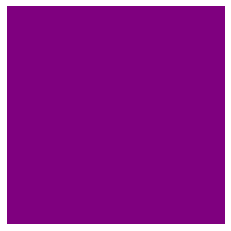

In [12]:
# test code: run but do not modify
purple = np.array([0.5, 0, 0.5])
C = Canvas(purple, 2001) # 2001 x 2001 pixels
C.show()


## Part C (15 points)

**Modifying your class above** (that is, not copy/pasting code), implement a method called `add_disk(centroid, radius, color)`, which draws a colored disk with specified `radius`, centered at `centroid`, of the specified color. 

- `centroid` may be assumed to be a tuple, list, or Numpy array of the form `(x,y)`, where `x` gives the horizontal coordinate of the disk's center and `y` gives the vertical coordinate. 
- All points within distance `radius` of the `centroid` should be filled in with `color`. 


For example, the code 

```python
purple = np.array([.5, 0, .5])
white  = np.array([1, 1, 1])

C = Canvas(background = purple, n = 2001)
C.add_disk((1001, 1001), 500, white)
C.show()
```

should produce the following image: 

<figure class="image" style="width:80%">
  <img src="https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/_images/purple-white.png" alt="">
  <figcaption><i>Example output.</i></figcaption>
</figure>


Run the test code supplied below to demonstrate that your code is working. 

### Math Note

Recall that the (open) disk of radius $r$ with centroid $(x_0, y_0)$ is the set of all points $(x,y)$ satisfying the formula

$$(x - x_0)^2 + (y - y_0)^2 < r^2\;.$$

### Programming Notes

- The function `np.meshgrid` is a useful way to represent the horizontal and vertical coordinates. If you take this approach, you should ensure that this function is called only **once** even if your user calls `self.add_disk()` multiple times. 
- This problem can be solved using a loop for **partial** credit. 
- If you do take the loop-based approach for partial credit, you may need to reduce `n`, the size of the `Canvas`, in the examples below, as your code might be slower. 

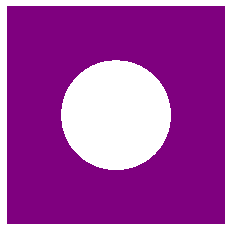

In [13]:
# test code: run but do not modify
purple = np.array([.5, 0, .5])
white  = np.array([1, 1, 1])

C = Canvas(background = purple, n = 2001)
C.add_disk((1001, 1001), 500, white)
C.show()

## Part D (15 points)

Modify your code from Part B (still no copy/paste), write a method called `add_bullseye(centroid, radius, color1, color2, bandwidth)`. This method should create a bullseye pattern consisting of concentric circles with alternating colors. Each circle should have thickness equal to `bandwidth`, and the radius of the entire pattern should be equal to `radius`. For example: 

```python
purple = np.array([0.5, 0.0, 0.5])
white  = np.array([1.0, 1.0, 1.0])
grey   = np.array([0.2, 0.2, 0.2])

C = Canvas(background = grey, n = 2001)
C.add_bullseye((1001, 1001), 500, purple, white, bandwidth = 50)
C.show()
```

<figure class="image" style="width:80%">
  <img src="https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/_images/one-bullseye.png" alt="">
  <figcaption><i>Example output.</i></figcaption>
</figure>

In this example, each of the bands is 50 pixels thick, and the entire pattern has radius 500. 

### Loops

In this part, it would be appropriate to write **one** `for`- or `while`-loop. 

### Hint

You might wish to create a new cell and run the following code -- it could help you catch on to the right idea. 

```python
purple = np.array([0.5, 0.0, 0.5])
white  = np.array([1.0, 1.0, 1.0])
grey   = np.array([0.2, 0.2, 0.2])

C = Canvas(background = grey, n = 2001)
C.add_disk((1001, 1001), 500, purple)
C.add_disk((1001, 1001), 450, white)
C.show()
```


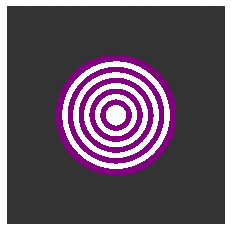

In [14]:
# test code: run but do not modify
purple = np.array([0.5, 0.0, 0.5])
white  = np.array([1.0, 1.0, 1.0])
grey   = np.array([0.2, 0.2, 0.2])

C = Canvas(background = grey, n = 2001)
C.add_bullseye((1001, 1001), 500, purple, white, bandwidth = 50)
C.show()

# Part E (5 points)

Write a further demonstration of the correct functioning of your code by creating a new `Canvas` with at least three bullseyes drawn on it. You should demonstrate: 

- At least three (3) different centroids. 
- At least four (4) different colors. 
- At least three (3) different values of the `bandwidth` parameter. 

You're also welcome to vary the `radius` parameter, but this isn't required.  

You're encouraged to be creative! Coordinate your colors, let your bullseyes partially intersect, etc. etc. But if you're not really feeling your artistic mojo today, it's ok to base your solution on the example shown at the very beginning of this problem, which satisfies all of the above criteria. I've predefined the colors I used for your convenience. 

Provided that you've solved up to Part D correctly, no further modifications to your `Canvas` class are required.  

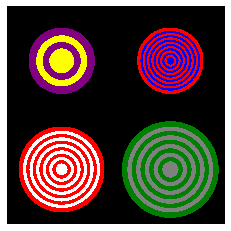

In [6]:
# predefined colors -- feel free to add your faves!

purple = np.array([.5, 0, .5])
white  = np.array([1, 1, 1])
green  = np.array([0, 1, 0])
blue   = np.array([0, 0, 1])
orange = np.array([1, .4, 0])
yellow = np.array([1, 1, 0])
grey   = np.array([.2,.2,.2])
red    = np.array([1,.2,.1])
black  = np.array([0,0,0])

# write your demonstration here
# don't forget to show the image! 

P = Canvas(background = black, n = 2001)
P.add_bullseye((501, 501), 250, purple, yellow, bandwidth = 60)
P.add_bullseye((1501,1501), 400, green, grey, bandwidth = 40)
P.add_bullseye((1501, 500), 280, red, blue, bandwidth = 20)
P.add_bullseye((500, 1500), 375, red, white, bandwidth = 30)
P
P.show()